### 앙상블 랜덤 포레스트

RandomForestClassifier(n_estimators=5, random_state=2)

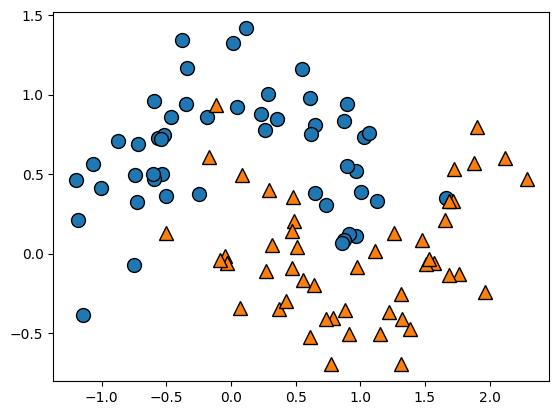

In [5]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import mglearn

# make_moons: 분류용 가상 데이터 생성
# noise: 가우시안 노이즈, X: shape(n_samples,2), y: shape(n_samples,)
X, y = make_moons(n_samples=100, noise=0.25, random_state=3)

# 가상 데이터 시각화
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

# data split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

# forest classifier 생성
forest = RandomForestClassifier(n_estimators=5, random_state=2)
forest.fit(X_train, y_train)

# 만들어진 트리는 estimators_에 저장됨

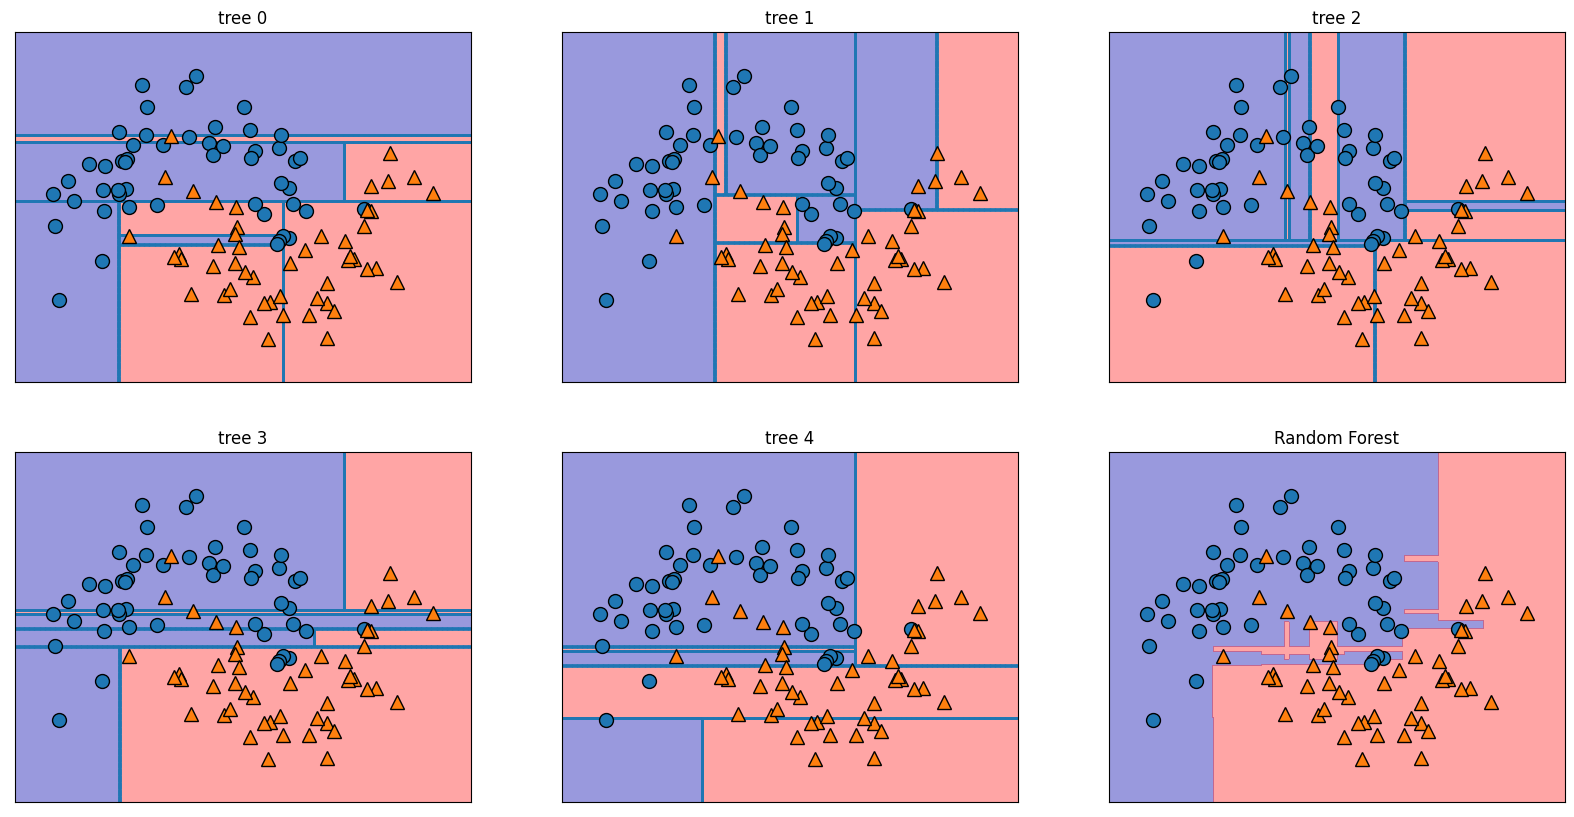

In [7]:
# 랜덤한 결정 트리의 예측 확률 시각화

fig, axes = plt.subplots(2, 3, figsize=(20,10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
    ax.set_title('tree {}'.format(i))
    mglearn.plots.plot_tree_partition(X, y, tree, ax=ax)

mglearn.plots.plot_2d_separator(forest, X, fill=True, ax=axes[-1, -1], alpha=.4)
axes[-1, -1].set_title('Random Forest')
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

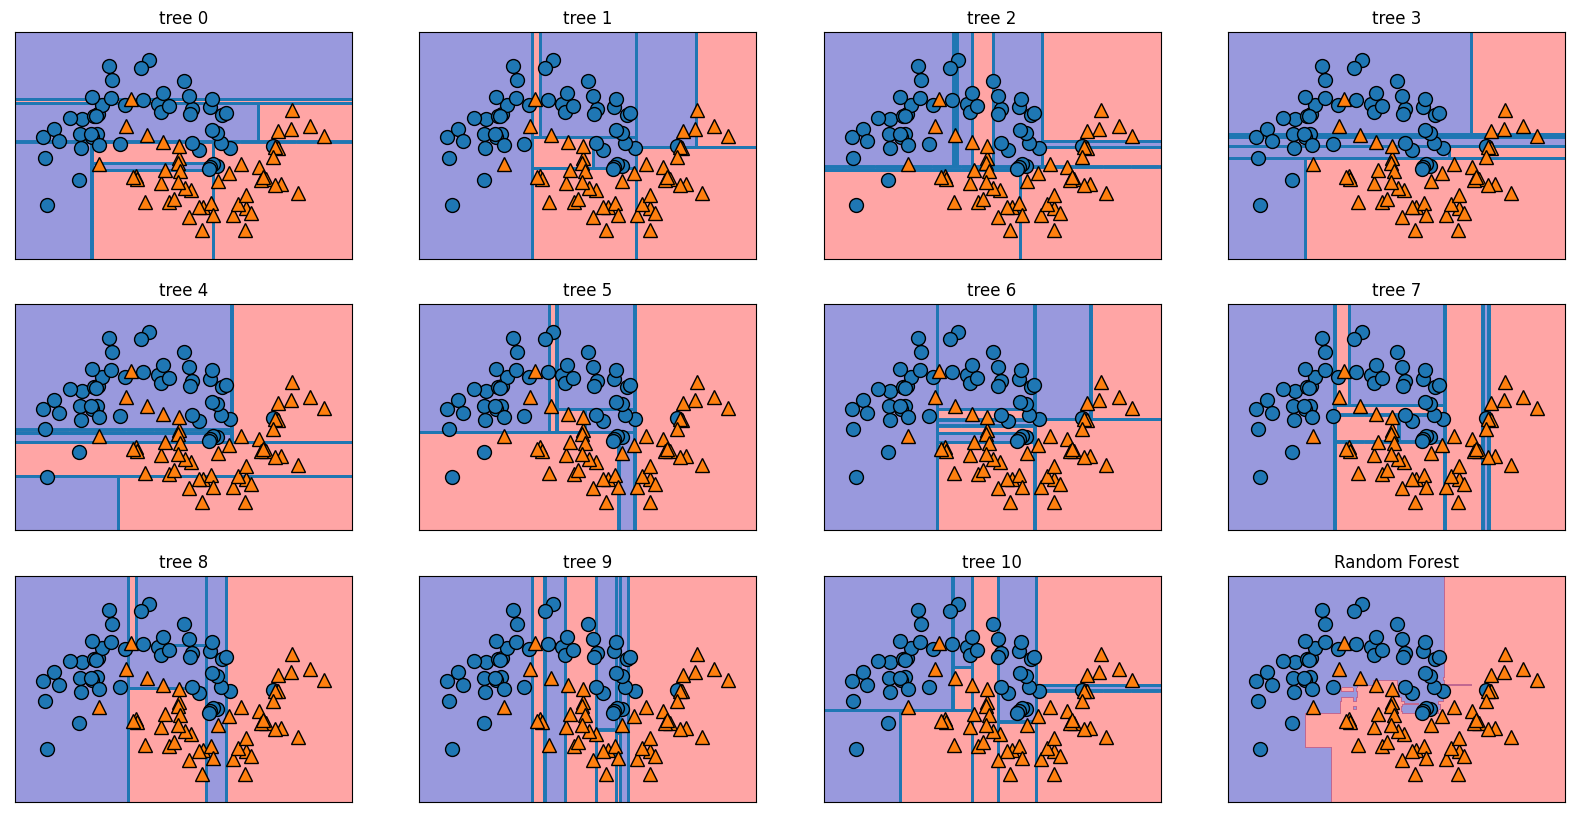

In [8]:
# n_estimators = 11
forest = RandomForestClassifier(n_estimators=11, random_state=2)
forest.fit(X_train, y_train)

# 시각화
fig, axes = plt.subplots(3, 4, figsize=(20,10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
    ax.set_title('tree {}'.format(i))
    mglearn.plots.plot_tree_partition(X, y, tree, ax=ax)

mglearn.plots.plot_2d_separator(forest, X, fill=True, ax=axes[-1, -1], alpha=.4)
axes[-1, -1].set_title('Random Forest')
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

# 결정 경계가 더 부드러워짐

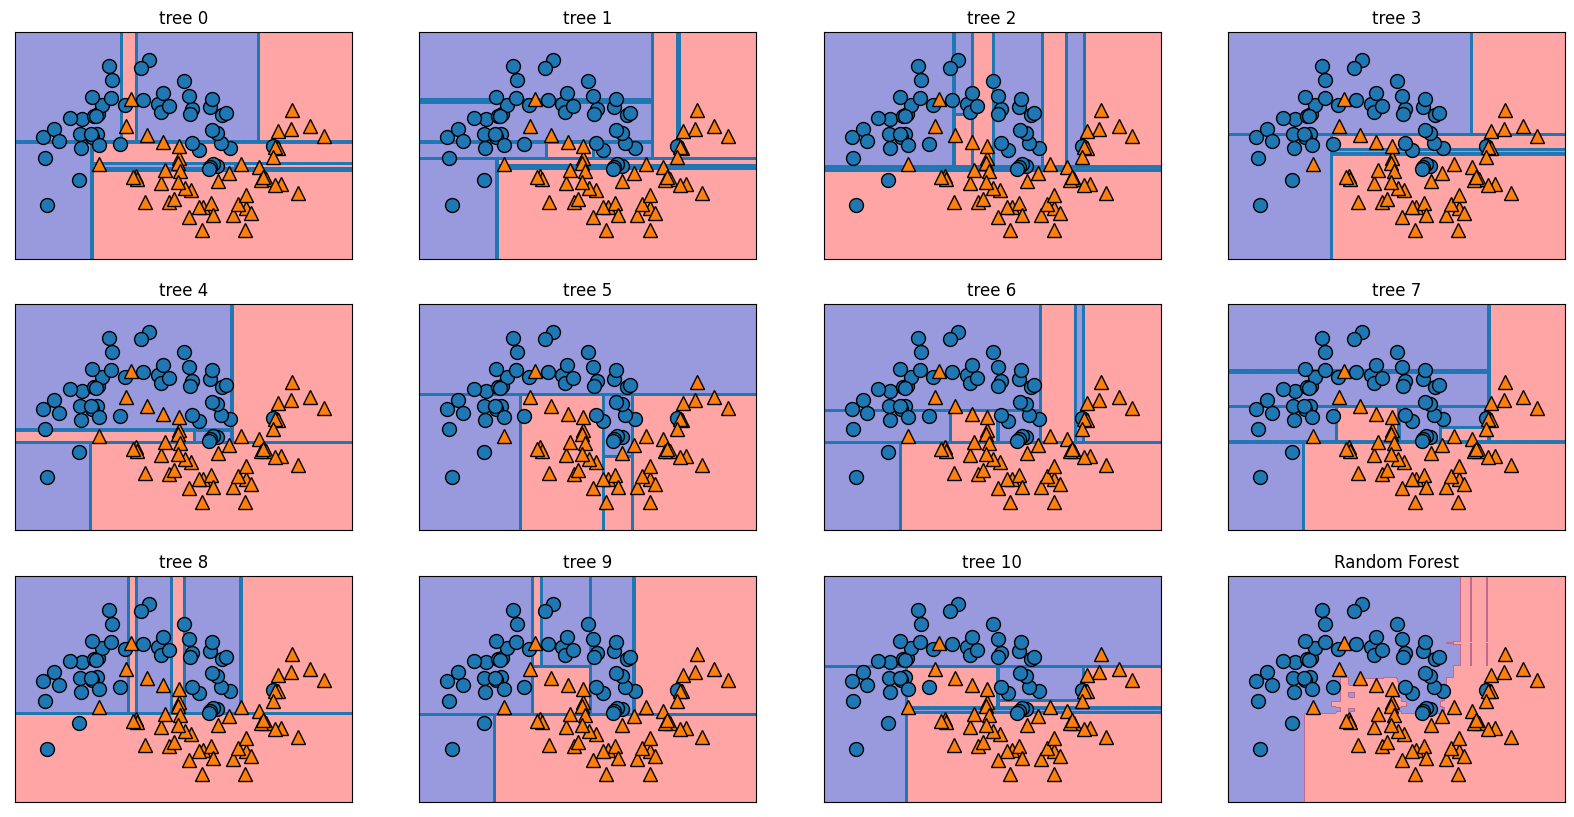

In [9]:
# n_estimators = 11, max_feature = 5 제한하기
forest = RandomForestClassifier(n_estimators=11, max_features=5, random_state=2)
forest.fit(X_train, y_train)

# 시각화
fig, axes = plt.subplots(3, 4, figsize=(20,10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
    ax.set_title('tree {}'.format(i))
    mglearn.plots.plot_tree_partition(X, y, tree, ax=ax)

mglearn.plots.plot_2d_separator(forest, X, fill=True, ax=axes[-1, -1], alpha=.4)
axes[-1, -1].set_title('Random Forest')
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)


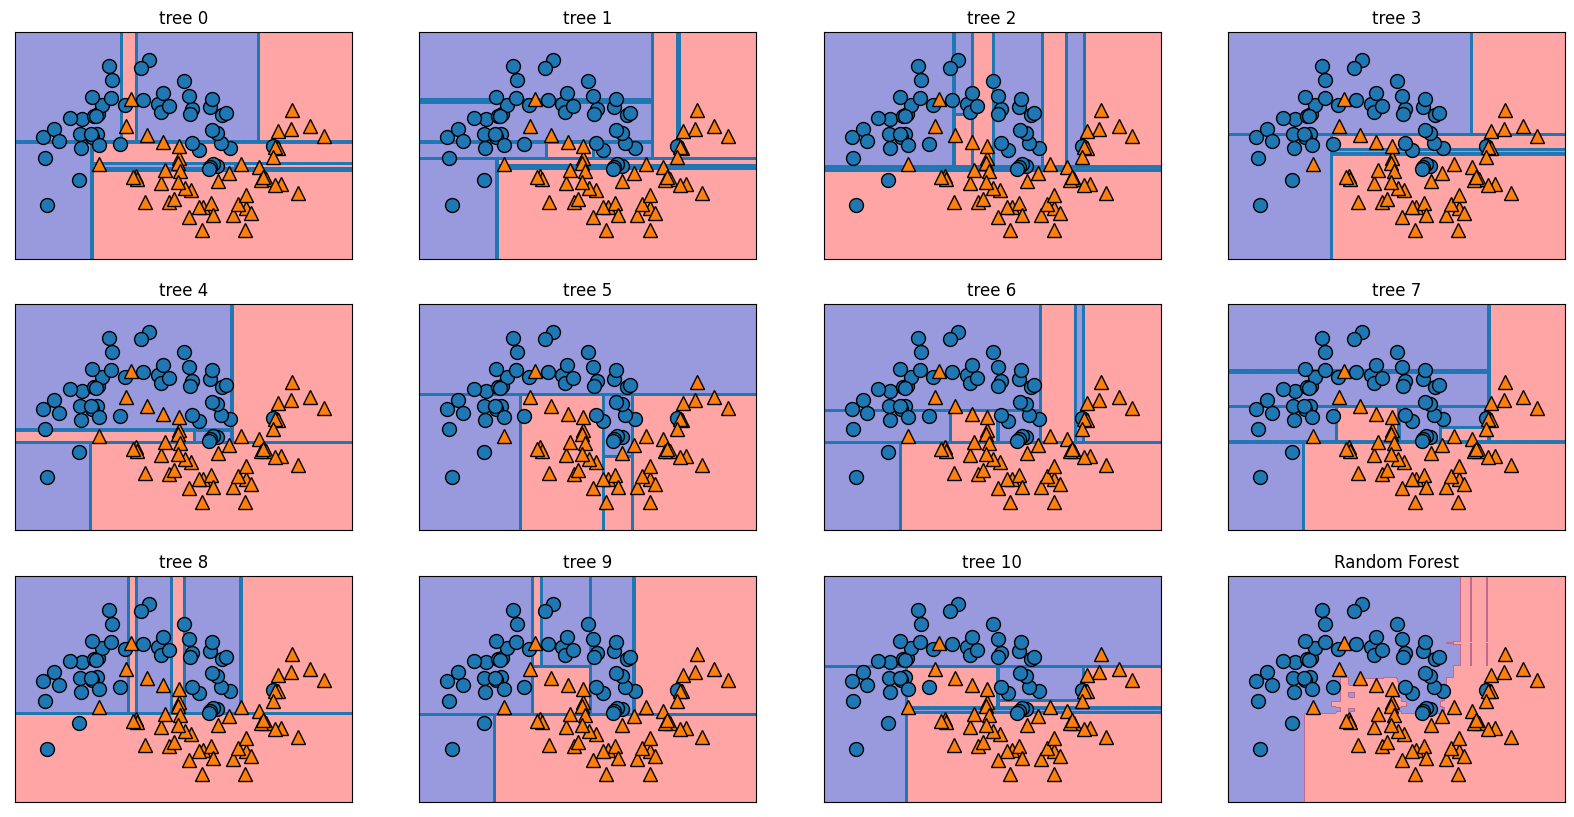

In [10]:
# n_estimators = 11, max_feature = 10 제한하기
forest = RandomForestClassifier(n_estimators=11, max_features=10, random_state=2)
forest.fit(X_train, y_train)

# 시각화
fig, axes = plt.subplots(3, 4, figsize=(20,10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
    ax.set_title('tree {}'.format(i))
    mglearn.plots.plot_tree_partition(X, y, tree, ax=ax)

mglearn.plots.plot_2d_separator(forest, X, fill=True, ax=axes[-1, -1], alpha=.4)
axes[-1, -1].set_title('Random Forest')
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)


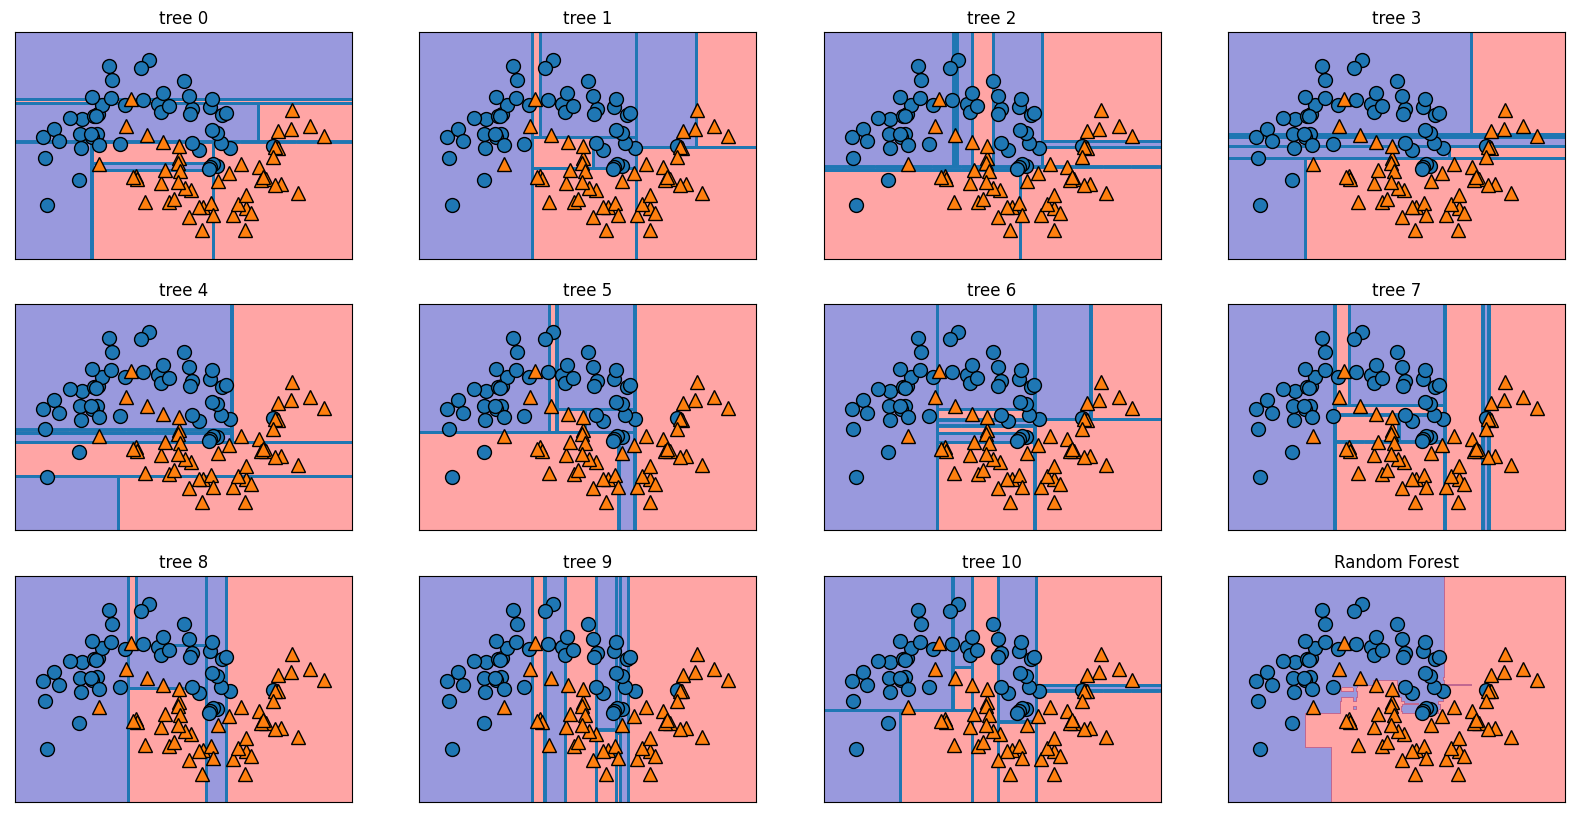

In [11]:
# n_estimators = 11, max_feature = 1 제한하기
forest = RandomForestClassifier(n_estimators=11, max_features=1, random_state=2)
forest.fit(X_train, y_train)

# 시각화
fig, axes = plt.subplots(3, 4, figsize=(20,10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
    ax.set_title('tree {}'.format(i))
    mglearn.plots.plot_tree_partition(X, y, tree, ax=ax)

mglearn.plots.plot_2d_separator(forest, X, fill=True, ax=axes[-1, -1], alpha=.4)
axes[-1, -1].set_title('Random Forest')
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)


### 유방암 데이터 셋으로 랜덤 포레스트 적용

In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)
forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)

print("train data accuracy: {:.3f}".format(forest.score(X_train, y_train)))
print("test data accuracy: {:.3f}".format(forest.score(X_test, y_test)))

train data accuracy: 1.000
test data accuracy: 0.972


<AxesSubplot: >

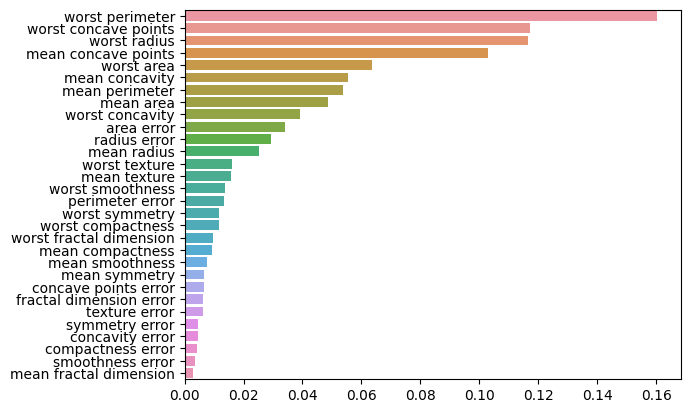

In [17]:
# 피처 중요도에 따른 시각화
import pandas as pd
import seaborn as sns

forest_series = pd.Series(forest.feature_importances_, index = cancer.feature_names)
forest_series = forest_series.sort_values(ascending=False)
sns.barplot(x=forest_series, y=forest_series.index)

### Gradient Boosting (GBM)

In [19]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)
gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train)

print('Train data accuracy: {:.3f}'.format(gbrt.score(X_train, y_train)))
print('Test data accuracy: {:.3f}'.format(gbrt.score(X_test, y_test)))

Train data accuracy: 1.000
Test data accuracy: 0.965


In [27]:
# 과대적합 방지하기 위해 max_depth 줄이기
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)

print('Train data accuracy: {:.3f}'.format(gbrt.score(X_train, y_train)))
print('Test data accuracy: {:.3f}'.format(gbrt.score(X_test, y_test)))

Train data accuracy: 0.991
Test data accuracy: 0.972


In [23]:
# learning rate 조절하기
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1, learning_rate=0.01)
gbrt.fit(X_train, y_train)

print('Train data accuracy: {:.3f}'.format(gbrt.score(X_train, y_train)))
print('Test data accuracy: {:.3f}'.format(gbrt.score(X_test, y_test)))
# 처음보다 test accuracy가 낮아짐

Train data accuracy: 0.927
Test data accuracy: 0.958


<AxesSubplot: >

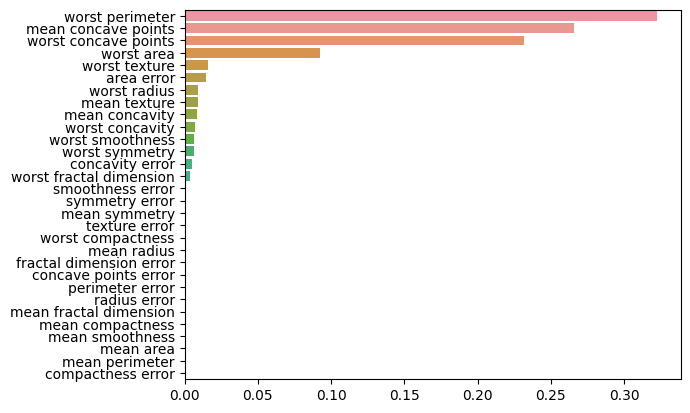

In [28]:
# importance features 시각화
import pandas as pd
import seaborn as sns

gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)

gbrt_series = pd.Series(gbrt.feature_importances_, index = cancer.feature_names)
gbrt_series = gbrt_series.sort_values(ascending=False)
sns.barplot(x=gbrt_series, y=gbrt_series.index)


In [29]:
gbrt.feature_importances_

array([0.00000000e+00, 9.07529959e-03, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 8.32035766e-03, 2.65686907e-01,
       3.49588341e-04, 0.00000000e+00, 0.00000000e+00, 3.00083378e-04,
       0.00000000e+00, 1.45838255e-02, 1.05083243e-03, 0.00000000e+00,
       4.75469106e-03, 0.00000000e+00, 9.56890421e-04, 0.00000000e+00,
       9.23939383e-03, 1.61819935e-02, 3.22495788e-01, 9.24249926e-02,
       6.44041105e-03, 0.00000000e+00, 6.85101108e-03, 2.31450675e-01,
       6.41500790e-03, 3.42225071e-03])